# Predicting flight delays

This notebook is a start to predict the delays of flights from a 2015 dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
#macbook
airlines = pd.read_csv(os.path.abspath("airlines.csv"))
airports = pd.read_csv(os.path.abspath("airports.csv"))
flights = pd.read_csv(os.path.abspath("flights_train.csv"))

FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Users\\Megiel Kerkhoven\\Documents\\Applied Machine Learning\\Predicting flight delays\\airlines.csv'

In [6]:
airlines = pd.read_csv("data\\airlines.csv")
airports = pd.read_csv("data\\airports.csv")
flights = pd.read_csv("data\\flights_train.csv")

## Inspecting the data

In [3]:
delays = flights['ARRIVAL_DELAY']

counter_delay = 0
counter_no_delay = 0 
for delay in delays:
    if delay <= 0:
        counter_no_delay += 1
    if delay > 0:
        counter_delay += 1
print(f' the amount of delays in the set is: {counter_delay} \n the amount of no delays in the set is: {counter_no_delay}')


 the amount of delays in the set is: 895684 
 the amount of no delays in the set is: 1430022


## Making some extra variables that might be nice

In [4]:
flights['est_delay'] =  flights['SCHEDULED_ARRIVAL'] - flights['ARRIVAL_TIME']
flights['squared_error_est_delay'] = (flights['ARRIVAL_DELAY']-flights['est_delay'])**2

MSE = sum(flights['squared_error_est_delay'])/len(flights['squared_error_est_delay']) #71379.83635764796

In [10]:
flights['est_elapsed_delay']= flights['ELAPSED_TIME'] - flights['SCHEDULED_TIME']

flights['est_elapsed_departure_delay']= flights['DEPARTURE_TIME'] - flights['SCHEDULED_TIME']

In [7]:
for var in flights:
    print (var)

id
YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
SCHEDULED_ARRIVAL
ARRIVAL_DELAY


## Fitting a linear model

Defining variables

In [14]:
x = flights[["est_elapsed_departure_delay", 
            "est_elapsed_delay"]]
y = flights['ARRIVAL_DELAY']

Fitting the moddel

In [16]:
linear1 = LinearRegression().fit(x, y)
delay_predictions = linear1.predict(x)
print('Intercept: \n', linear1.intercept_)
print('Coefficients: \n', linear1.coef_)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary() # R = 1.0 so yeah that kind of ruins it
print(print_model)

Intercept: 
 -4.996656296599441
Coefficients: 
 [0.01299235 1.05721406]
                                 OLS Regression Results                                
Dep. Variable:          ARRIVAL_DELAY   R-squared (uncentered):                   0.163
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                          2.754e+05
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:19:01   Log-Likelihood:                     -1.4221e+07
No. Observations:             2818553   AIC:                                  2.844e+07
Df Residuals:                 2818551   BIC:                                  2.844e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std er

In [17]:
plt.scatter(x, y)
plt.plot(x, delay_predictions, color = 'red')
plt.show()

ValueError: x and y must be the same size

# Visualisation

(array([ 12748.,   3580., 271036., 373408., 292031., 370673., 326452.,
        329872., 275315.,  70591.]),
 array([1.0000e+00, 2.4090e+02, 4.8080e+02, 7.2070e+02, 9.6060e+02,
        1.2005e+03, 1.4404e+03, 1.6803e+03, 1.9202e+03, 2.1601e+03,
        2.4000e+03]),
 <a list of 10 Patch objects>)

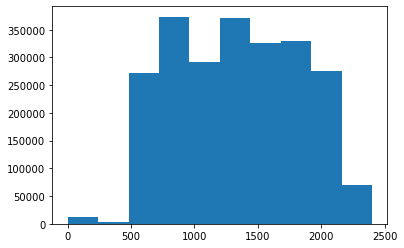

In [20]:
plt.hist(flights['DEPARTURE_TIME'])